[1.6000000000000003, -1]


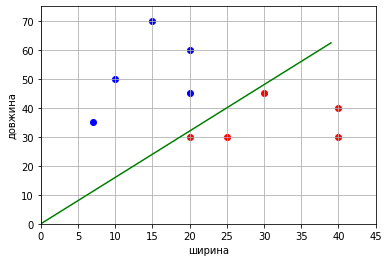

In [7]:
#Задача 1. 
import numpy as np
import matplotlib.pyplot as plt

# Вхідні дані
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)                          # розмір навчальної вибірки
w = [0, -1]                                     # початкове значення вектора w
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])    # вирішальне правило
N = 50                                          # максимальне число ітерацій
L = 0.1                                         # крок зміни ваги
e =0.1                                         # невелика додаткова величина для w0, щоб був зазор між розділювальною лінією та граничним образом

last_error_index = -1                           # індекс останнього помилкового спостереження

for n in range(N):
    for i in range(n_train):                # перебір по спостереженням
        if y_train[i]*a(x_train[i]) < 0:    # якщо помилка класифікації,
            w[0] = w[0] + L * y_train[i]    # то корекція ваги w0
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i]*a(x_train[i]) < 0])
    if Q == 0:      # показник якості класифікації (число помилок)
        break       # зупинка, якщо всі правильно класифіковані

if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print(w)

line_x = list(range(max(x_train[:, 0])))    # формування графіка розділювальної лінії
line_y = [w[0]*x for x in line_x]

x_0 = x_train[y_train == 1]                 # формування точок для 1-го класу
x_1 = x_train[y_train == -1]                # формування точок для 2-го класу

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()


coefficient of determination: 0.7751696203748776
intercept: 0.19121880277161818
slope: [ 0.05793234 -0.0346272 ]


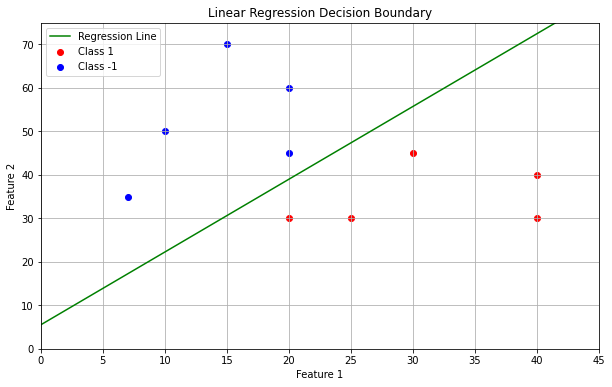

In [10]:
#Задача 1 за допомогою лін. регресії
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Вхідні дані
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Створення і тренування моделі
model = LinearRegression().fit(x_train, y_train)

# Оцінка моделі
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# Формування графіка розділяючої лінії
line_x = np.linspace(0, 45, 100)
line_y = (-model.coef_[0] * line_x - model.intercept_) / model.coef_[1]

# Формування точок для 1-го і 2-го класів
x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

# Побудова графіка
plt.figure(figsize=(10, 6))

# Відображення точок даних
plt.scatter(x_0[:, 0], x_0[:, 1], color='red', label='Class 1')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue', label='Class -1')

# Відображення лінії регресії
plt.plot(line_x, line_y, color='green', label='Regression Line')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.title('Linear Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


[ 0.05793234 -0.0346272   0.1912188 ]


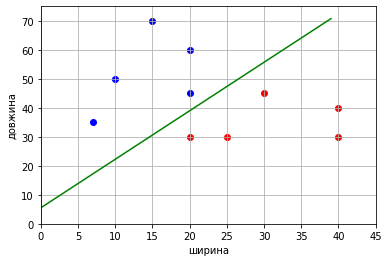

In [17]:
#Задача 2. Аналітичний розв'язок
import numpy as np
import matplotlib.pyplot as plt

# Навчальна вибірка та мітки класів
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]

# Додавання стовпця з одиницями для врахування зсуву (вільного члена)
x_train = [x + [1] for x in x_train]

# Перетворення в numpy array для використання у векторних операціях
x_train = np.array(x_train)

# Мітки класів
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Обчислення ваги w за допомогою методу наименших квадратів (МНК)
pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0)
xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)
w = np.dot(pt, np.linalg.inv(xxt))
print(w)

# Формування значень x для графіку розділювальної лінії
line_x = list(range(max(x_train[:, 0])))

# Формування значень y для графіку розділювальної лінії
line_y = [-x*w[0]/w[1] - w[2]/w[1] for x in line_x]

# Формування точок для першого класу
x_0 = x_train[y_train == 1]

# Формування точок для другого класу
x_1 = x_train[y_train == -1]

# Візуалізація даних
plt.scatter(x_0[:, 0], x_0[:, 1], color='red')  # Точки для першого класу червоним
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')  # Точки для другого класу синім
plt.plot(line_x, line_y, color='green')  # Розділювальна лінія зеленим

# Налаштування меж графіка, назв осей, сітки та відображення графіка
plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

In [2]:
#Задача 3. Масштабування даних
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Приклад даних: зріст в сантиметрах) і вага (в кілограмах)
data = np.array([[150, 70], [160, 80], [170, 90], [180, 100]])

# Масштабування за допомогою MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(data)

# Масштабування за допомогою StandardScaler
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)

# Масштабування за допомогою RobustScaler
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(data)

print("Оригінальні дані:")
print(data)
print("\nМасштабовані дані (MinMaxScaler):")
print(min_max_scaled_data)
print("\nМасштабовані дані (StandardScaler):")
print(standard_scaled_data)
print("\nМасштабовані дані (RobustScaler):")
print(robust_scaled_data)


Оригінальні дані:
[[150  70]
 [160  80]
 [170  90]
 [180 100]]

Масштабовані дані (MinMaxScaler):
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]

Масштабовані дані (StandardScaler):
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]

Масштабовані дані (RobustScaler):
[[-1.         -1.        ]
 [-0.33333333 -0.33333333]
 [ 0.33333333  0.33333333]
 [ 1.          1.        ]]


In [32]:
from sklearn.preprocessing import normalize
X = [[-2, 1, 2], [-1, 0, 1]]
print (normalize(X))  

[[-0.66666667  0.33333333  0.66666667]
 [-0.70710678  0.          0.70710678]]


In [33]:
import pandas as pd
from sklearn.preprocessing import normalize

# Створення DataFrame з даними
data = {
    'age': [25, 45, 35, 50, 23],
    'weight': [80, 120, 60, 100, 75],
    'sugar_level': [90, 85, 110, 95, 105]
}

df = pd.DataFrame(data)

# Нормалізація даних
normalized_data = normalize(df)

# Виведення результатів
print("Оригінальні дані:\n", df)
print("\nНормалізовані дані:\n", pd.DataFrame(normalized_data, columns=df.columns))


Оригінальні дані:
    age  weight  sugar_level
0   25      80           90
1   45     120           85
2   35      60          110
3   50     100           95
4   23      75          105

Нормалізовані дані:
         age    weight  sugar_level
0  0.203279  0.650493     0.731804
1  0.292615  0.780307     0.552718
2  0.269032  0.461197     0.845529
3  0.340799  0.681598     0.647518
4  0.175481  0.572219     0.801107


Intercept (bias): 1.3097153395738044
Coefficients (weights): [-0.43328928 -0.7544082 ]
Mean Squared Error: 0.0017256036159319728


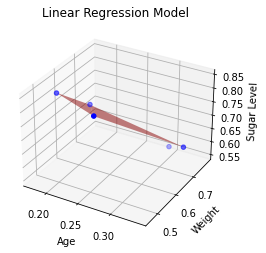

In [36]:
df_normalized = pd.DataFrame(normalized_data, columns=df.columns)

# Розділення нормалізованих даних на вхідні функції (X) та цільову змінну (y)
X = df_normalized[['age', 'weight']]
y = df_normalized['sugar_level']

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування рівня цукру в крові для тестового набору
y_pred = model.predict(X_test)

# Виведення параметрів моделі
print("Intercept (bias):", model.intercept_)
print("Coefficients (weights):", model.coef_)

# Оцінка ефективності моделі
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Візуалізація моделі лінійної регресії
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Вік, вага та рівень цукру в крові пацієнтів
x_age = df_normalized['age']
y_weight = df_normalized['weight']
z_sugar_level = df_normalized['sugar_level']

# Візуалізація точок даних
ax.scatter(x_age, y_weight, z_sugar_level, c='b', marker='o')

# Побудова площини лінійної регресії
x_age_pred = X_train['age']
y_weight_pred = X_train['weight']
z_sugar_level_pred = model.predict(X_train)
ax.plot_trisurf(x_age_pred, y_weight_pred, z_sugar_level_pred, color='r', alpha=0.5)

# Налаштування вісей та міток
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Sugar Level')

plt.title('Linear Regression Model')

plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Зчитуємо дані
df = pd.read_csv('heart.csv')

# Виводимо перші декілька рядків даних та описову статистику
df.head()
df.describe()
df.dtypes

# Перевірка на наявність пропущених значень
print("Пропущені значення:\n", df.isnull().sum())

# Перевірка на наявність дублікатів
print("Кількість дублікатів:", df.duplicated().sum())
print('Розмір таблиці', df.shape)
print('Назви стовпців', df.columns)
print('Описова характеристика:', df.describe())

Пропущені значення:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Кількість дублікатів: 3680
Розмір таблиці (5000, 13)
Назви стовпців Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Описова характеристика:                age      anaemia  creatinine_phosphokinase     diabetes  \
count  5000.000000  5000.000000               5000.000000  5000.000000   
mean     60.288736     0.474400                586.760600     0.439400   
std      11.697243 

In [51]:
# Знайдемо дублікати та видалимо їх
duplicate_rows = df[df.duplicated()]
df_1 = df.drop_duplicates()

print("Кількість знайдених дублікатів:", len(duplicate_rows))
print('Розмір таблиці', df_1.shape)

Кількість знайдених дублікатів: 3680
Розмір таблиці (1320, 13)


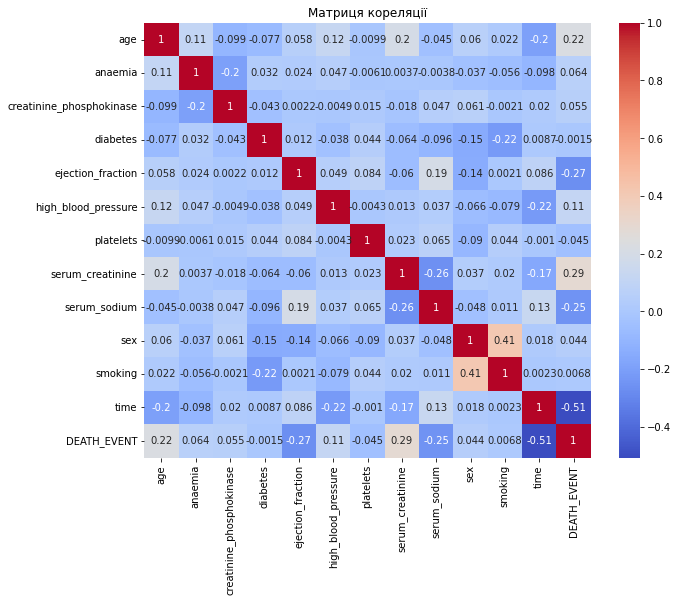

In [58]:
# Визначаємо кореляцію між ознаками та цільовою змінною
cor_matrix = df_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title("Матриця кореляції")
plt.show()

In [71]:

# Вибираємо необхідні стовпці
df_selected = df[['age', 'anaemia', 'diabetes', 
                  'high_blood_pressure', 'sex', 'serum_creatinine',  
                  'smoking', 'DEATH_EVENT']]

# Розділяємо дані на вхідні ознаки (X) та цільову змінну (y)
X = df_selected.drop(columns=['DEATH_EVENT'])
y = df_selected['DEATH_EVENT']

# Розділяємо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова та навчання моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred = model.predict(X_test)

# Оцінка ефективності моделі
mse = mean_squared_error(y_test, y_pred)
print("LinearRegr:", mse)

# Виведення коефіцієнтів моделі
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("Coefficients:\n", coefficients)

LinearRegr: 0.1807476509625888
Coefficients:
                      Coefficient
age                     0.007548
anaemia                 0.014895
diabetes                0.015427
high_blood_pressure     0.082223
sex                     0.054268
serum_creatinine        0.120619
smoking                -0.014665


In [73]:
#L2 s L1 регулярізація

# Ініціалізуємо моделі з регуляризацією L1 (Lasso) та L2 (Ridge)
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)

# Навчання моделей
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Прогнозуємо на тестовому наборі
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

# Оцінка моделей
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Lasso Model MSE:", lasso_mse)
print("Ridge Model MSE:", ridge_mse)


Lasso Model MSE: 0.1929296935604469
Ridge Model MSE: 0.18074763721408563


[ 4.97803425e+02 -5.96312836e-01 -1.00348056e+00 -1.27496285e+00
 -1.09040632e+00 -1.84750490e-01  6.58413500e-01 -3.03586207e-01
  6.87833680e-02 -8.98349460e-03  6.89985114e-04 -2.90537623e-05
  5.18877044e-07]


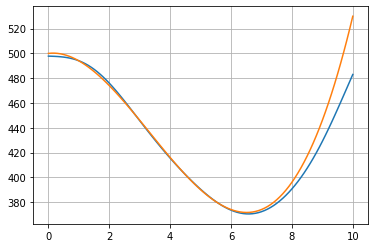

In [76]:
# Задаємо діапазон значень x
x = np.arange(0, 10.1, 0.1)

# Задаємо функцію у вигляді полінома x^3 - 10x^2 + 3x + 500
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x])

# Відбираємо кожен другий елемент для тренувальної вибірки
x_train, y_train = x[::2], y[::2]

# Розмір простору ознак (степінь полінома N-1)
N = 13  

# Параметр регуляризації L (збільшується при збільшенні N)
L = 20  

# Створюємо матрицю вхідних векторів
X = np.array([[a ** n for n in range(N)] for a in x])

# Створюємо матрицю lambda*I для регуляризації
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])

# Перший коефіцієнт не піддається регуляризації
IL[0][0] = 0  

# Відбираємо кожен другий елемент для тренувальної вибірки
X_train = X[::2]  

# Ознака - значення y для тренувальної вибірки
Y = y_train  

# Обчислення коефіцієнтів за формулою w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL)
w = Y @ X_train @ A

# Виведення коефіцієнтів
print(w)

# Побудова графіка оригінальних даних та прогнозу
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy)
plt.plot(x, y)
plt.grid(True)
plt.show()


[ 8.01297810e-05  7.43928881e-05  6.31712978e-02 -3.39860711e-02
  3.02613346e-04]
0.03470365877773064


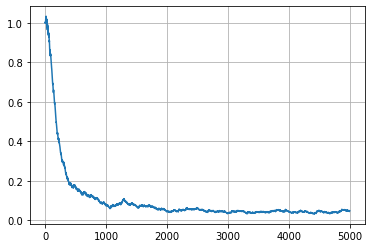

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна сигмоїдної функції втрат за вектором w
def df(w, x, y):
    L1 = 1.0
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Тренувальний набір з трьома ознаками (третій - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

fn = len(x_train[0])  # кількість ознак
n_train = len(x_train)  # розмір тренувального набору
w = np.zeros(fn)  # початкові вагові коефіцієнти
nt = 0.00001  # крок збіжності SGD
lm = 0.01  # швидкість "забування" для Q
N = 5000  # кількість ітерацій SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # показник якості
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)  # випадковий індекс
    ek = loss(w, x_train[k], y_train[k])  # обчислення втрат для вибраного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корекція вагових коефіцієнтів за SGD
    Q = lm * ek + (1 - lm) * Q  # перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # істинне значення емпіричного ризику після навчання
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()
